In [2]:
# 1. Import Libraries
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
# 🔥 Important: Now point to the 'train' folder specifically
data_path = "C:/Users/vanka/Downloads/src/Oily-Dry-Skin-Types/train"

# Get categories (dry, normal, oily)
categories = [folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))]
print(f"Detected categories: {categories}")

X = []
y = []

# Loop over each category
for category in categories:
    folder = os.path.join(data_path, category)
    label = category
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        
        if os.path.isfile(img_path):
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (224, 224))
                img = img / 255.0  # Normalize
                
                X.append(img)
                y.append(label)
            except (UnidentifiedImageError, Exception) as e:
                print(f"Error loading image: {img_path} -> {e}")
                continue

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded {len(X)} images successfully.")


Detected categories: ['dry', 'normal', 'oily']
✅ Loaded 4031 images successfully.


In [4]:
# 4. Encode Labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [5]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [6]:

# 6. Build the Model (Transfer Learning using VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False  # Freeze VGG16 layers

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
# 7. Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.4342 - loss: 1.5613 - val_accuracy: 0.5936 - val_loss: 0.9229
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 493s 5s/step - accuracy: 0.7608 - loss: 0.5970 - val_accuracy: 0.6592 - val_loss: 0.8418
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 499s 5s/step - accuracy: 0.8772 - loss: 0.3785 - val_accuracy: 0.6753 - val_loss: 0.7539
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 511s 5s/step - accuracy: 0.9027 - loss: 0.3059 - val_accuracy: 0.7683 - val_loss: 0.6328
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 505s 5s/step - accuracy: 0.9380 - loss: 0.2158 - val_accuracy: 0.7509 - val_loss: 0.6979
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 484s 5s/step - accuracy: 0.9765 - loss: 0.1281 - val_accuracy: 0.7807 - val_loss: 0.5988
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.9757 - loss: 0.1101 - val_accuracy: 0.7646 - val_loss: 0.6529
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.9935 - loss: 0.0561 - val_accu

In [8]:
# 8. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8242 - loss: 0.5672
Test Accuracy: 79.55%


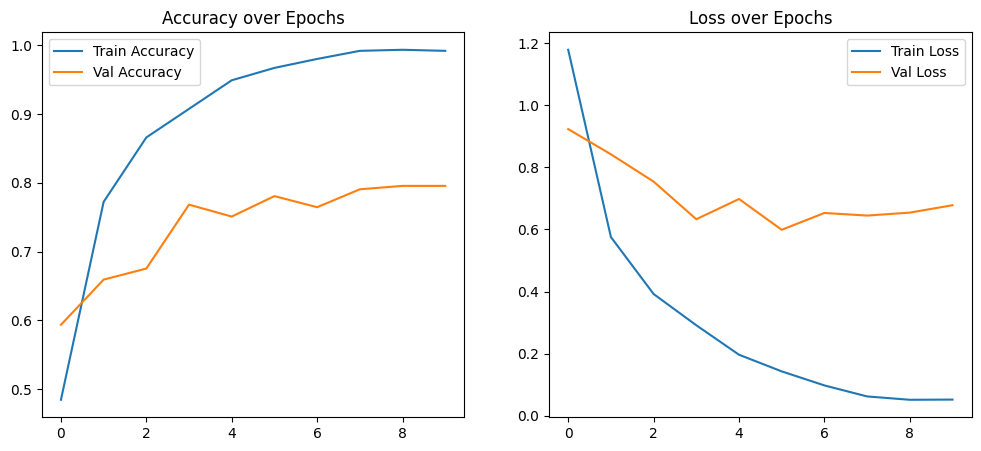

In [9]:
# 9. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


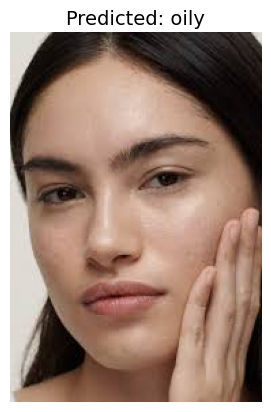

✅ Predicted Category: oily


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_image(img_path):
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
        # Predict
        prediction = model.predict(img_array)
        pred_class = np.argmax(prediction)

        # Show the image
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"Predicted: {encoder.inverse_transform([pred_class])[0]}", fontsize=14)
        plt.show()

        # Print the prediction
        print(f"✅ Predicted Category: {encoder.inverse_transform([pred_class])[0]}")

    except Exception as e:
        print(f"❌ Error predicting image: {e}")

# Example usage
predict_image("3.jpeg")


In [11]:
# Save model after training
model.save("ad.keras")
print("Model saved successfully.")

Model saved successfully.


In [12]:
import tensorflow as tf
print('Loading model ...')
model = tf.keras.models.load_model('ad.keras')

class_names = ['Low','Moderate','Severe']

def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def predict_class(filename):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  print('Loading image ...')
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  print('Predicting class of image ...')

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  print('Predicted class:', pred_class)
  return pred_class

predict_class('download.jpg')

Loading model ...
Loading image ...
Predicting class of image ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
[[7.9628447e-04 1.4143552e-03 9.9778926e-01]]
Predicted class: Severe


'Severe'

In [13]:
# Save model after training
model.save("pv.keras")
print("Model saved successfully.")

Model saved successfully.
